# COURSE: Master Python for scientific programming by solving projects
## PROJECT: State-space trajectories via PCA
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/maspy_x/?couponCode=202201

In [147]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Import and extract the data

Data are from http://crcns.org/data-sets/motor-cortex/alm-4/about-alm-4

In [148]:
# import the data (via gdrive mapping or upload)
# matdat = loadmat('/content/gdrive/My Drive/Colab Notebooks/maspy/stateSpaceTrajectories/ALMdata.mat')
matdat = loadmat('ALMdata.mat')

Nopr = matdat['PSTH_nonprefer_cue_aligned']
Pref = matdat['PSTH_prefer_cue_aligned']
t = matdat['t'][0]
chanidx = matdat['Channel_all']

# examine sizes of the variables
print(Nopr.shape), print(' ')
print(Pref.shape), print(' ')
print(t.shape), print(' ')
print(chanidx.shape)

# convert chanidx to an orientationless array
chanidx = chanidx.flatten()

(1186, 5101)
 
(1186, 5101)
 
(5101,)
 
(1186, 1)


# Inspect and clean the data

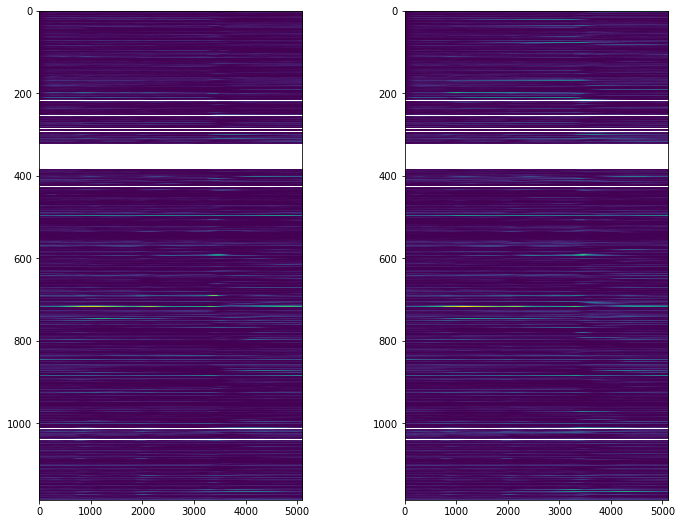

In [149]:
# Let's have a look at the data

fig,ax = plt.subplots(1,2,figsize=(12,9))

# show images of the preferred and non-preferred datasets

ax[0].imshow(Nopr)
ax[0].set_aspect(8)

ax[1].imshow(Pref)
ax[1].set_aspect(8)

plt.show()

nan

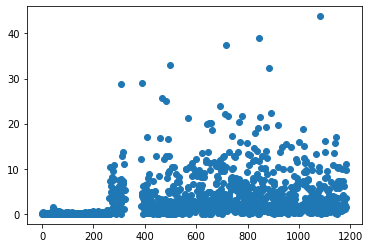

In [150]:
# investigate the "white spaces" by plotting some individual rows

plt.plot(Nopr[:,0],'o')
Nopr[350,1]

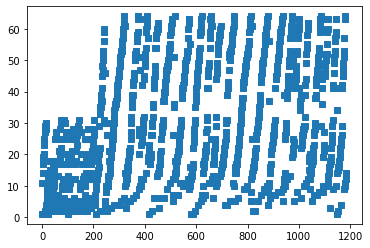

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64], dtype=uint8)

In [151]:
# an aside on the chanidx vector

plt.plot(chanidx,'s')
plt.show()

np.unique(chanidx)

In [152]:
# remove NaN rows from Nopr, Pref, and chanidx
print(sum(np.isnan(Nopr[:,0])))

goodChans = ~np.isnan(Nopr[:,0,])
Nopr = Nopr[goodChans,:]
Pref = Pref[goodChans,:]
chanidx = chanidx[goodChans]
print(Nopr.shape)
print(Pref.shape)

75
(1111, 5101)
(1111, 5101)


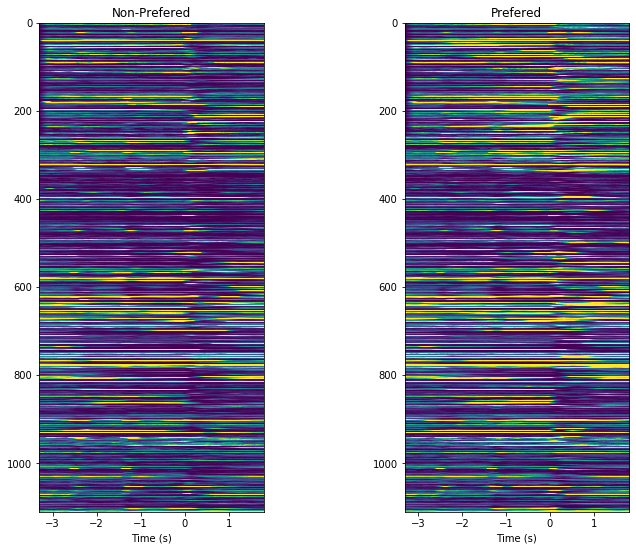

In [153]:
# Let's have a look at the data (same images as done earlier)
fig,ax = plt.subplots(1,2,figsize=(12,9))
ax[0].imshow(Nopr,vmin=0,vmax=15,extent=[t[0],t[-1],Nopr.shape[0],0])
ax[0].set_aspect(.01)
ax[0].set_title('Non-Prefered')
ax[1].imshow(Pref,vmin=0,vmax=15,extent=[t[0],t[-1],Nopr.shape[0],0])
ax[1].set_aspect(.01)
ax[1].set_title('Prefered')
ax[0].set_xlabel('Time (s)')
ax[1].set_xlabel('Time (s)')
plt.show()


In [154]:
# plot the average time series


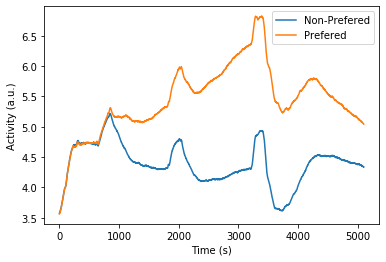

5101

In [155]:
plt.plot(np.mean(Nopr,axis=0),label ='Non-Prefered')
plt.plot(np.mean(Pref,axis=0),label ='Prefered')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Activity (a.u.)')
plt.show()
t.shape[0]

# Create channel covariance matrix

In [156]:
nchans = np.max(chanidx)

# initialize
chanaveNopr = np.zeros((nchans,len(t)))
chanavePref = np.zeros((nchans,len(t)))


print(Nopr.ndim,type(Nopr))
print(chanaveNopr.ndim,type(chanaveNopr))
print(chanidx.ndim,type(chanidx))
for i in range(nchans): # get error b/c chanidx starts at 1
    chanavePref[i,:] = np.mean(Pref[chanidx==i+1,:],axis=0)
    chanaveNopr[i,:] = np.mean(Nopr[chanidx==i+1,:],axis=0)
    
    
chanavePref[0,0]


2 <class 'numpy.ndarray'>
2 <class 'numpy.ndarray'>
1 <class 'numpy.ndarray'>


1.5476232045563545

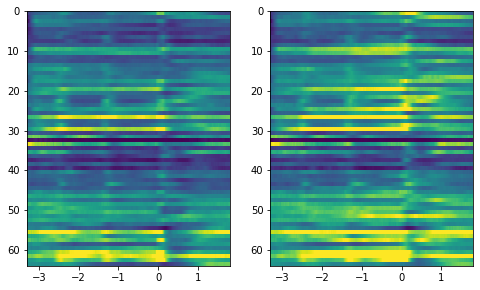

In [157]:
# Let's have a look at the data, also with images but now of the new data matrices

fig,ax = plt.subplots(1,2,figsize=(8,5))

ax[0].imshow(chanaveNopr,vmin=0,vmax=10,extent=[t[0],t[-1],chanaveNopr.shape[0],0])
ax[0].set_aspect(.1)
ax[1].imshow(chanavePref,vmin=0,vmax=10,extent=[t[0],t[-1],chanavePref.shape[0],0])
ax[1].set_aspect(.1)
plt.show()

1.5912060586527488
1.5912060586527488
(64, 64)


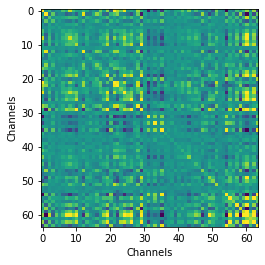

In [158]:
# now create the covariance matrix

#mean centering matrixs
print(chanaveNopr[0,0])
chanaveNopr = chanaveNopr#(chanaveNopr.T-chanaveNopr.mean(axis=1)).T
chanavePref = chanavePref#(chanavePref.T-chanavePref.mean(axis=1)).T
print(chanaveNopr[0,0])
CovNopr =  np.cov(chanaveNopr)
CovPref = np.cov(chanavePref)
print(CovPref.shape)
# average both conditions (pref and nopref) together
#  mean-center each row

# check that average over time within each channel is zero


# compute covariance matrix
covmat = (CovNopr+CovPref)/2

# show it!
plt.imshow(covmat,vmin=-2,vmax=2)
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()

# now for the PCA

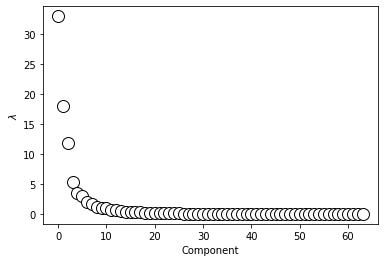

33.00131408068444 -0.14097781355385605 1.5912060586527488 1.5476232045563545


In [159]:
# eigendecomposition (tip: use eigh)
(evals,eigVectors) = np.linalg.eig(covmat)
sidx = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = eigVectors[:,sidx]
# sort the solutions according to the eigenvalues (sort the eigenvectors too!)


plt.plot(evals,'ko',markerfacecolor='w',markersize=12)
plt.xlabel('Component')
plt.ylabel('$\lambda$')
plt.show()
print(evals[0],eigVectors[0,0],chanaveNopr[0,0],chanavePref[0,0])

0.15131548919859472
(2, 5101)


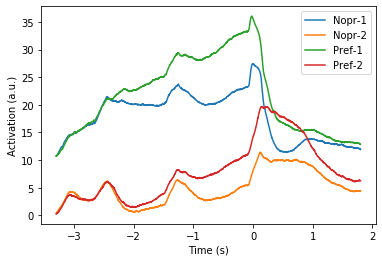

In [162]:
# compute the PCs
print(chanavePref[2,2])
# flip eigenvector sign according to max value
for i in range(nchans):
  # find maximum component value
  maxi = np.argmax(abs(evecs[:,i]))
  evecs[:,i] *= np.sign(evecs[maxi,i])


# compute PCs
pcNopr = evecs[:,0:2].T @ chanaveNopr
pcPref = evecs[:,0:2].T @ chanavePref
print(pcNopr.shape)
# plot as time series
plt.plot(t,pcNopr.T, t,pcPref.T)
plt.xlabel('Time (s)')
plt.ylabel('Activation (a.u.)')
plt.legend(['Nopr-1','Nopr-2','Pref-1','Pref-2'])
plt.show()


# Create the state-space trajectory

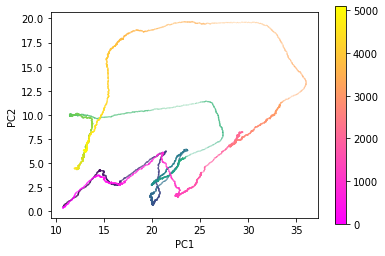

In [193]:
# state-space diagram
plt.scatter(pcNopr[0,:],pcNopr[1,:],s=.1,marker='.',c=np.arange(pcNopr[0,:].shape[0]), cmap='viridis')
plt.scatter(pcPref[0,:],pcPref[1,:],s=.1,marker='.',c=np.arange(pcNopr[0,:].shape[0]), cmap='spring')
plt.gca().set_aspect('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

# Bonus: Draw time as hue

In [ ]:
# tip: use seaborn's scatterplot function
